Dataset Loaded Successfully!

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59

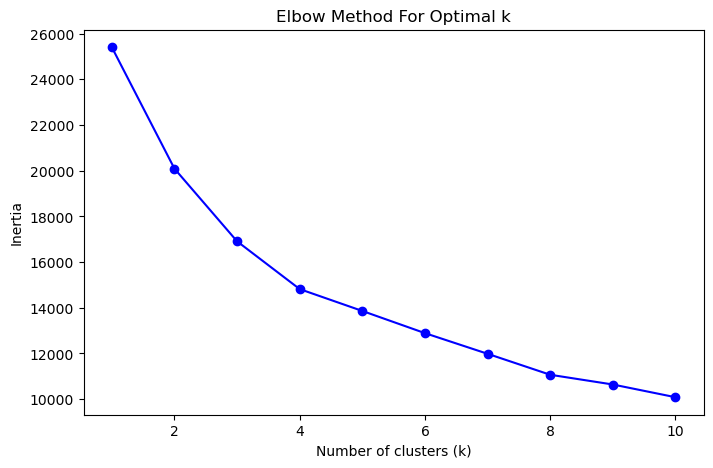


Cluster Centers:
 [[ 0.80842073  0.15626173  0.1599169  -0.10322049  0.13943053 -1.15351152
  -1.15675151  1.18412804  0.07164397]
 [-0.26408187  0.0398995   0.70503285  0.01560294  0.53444299  0.50961433
   0.5069744  -0.44559165  0.62315027]
 [-0.30770787 -0.1781969  -1.04941352  0.06293662 -0.81019145  0.26569688
   0.2717579  -0.3739815  -0.87128259]]

Cluster Counts:
 Cluster
1    1183
2     907
0     733
Name: count, dtype: int64


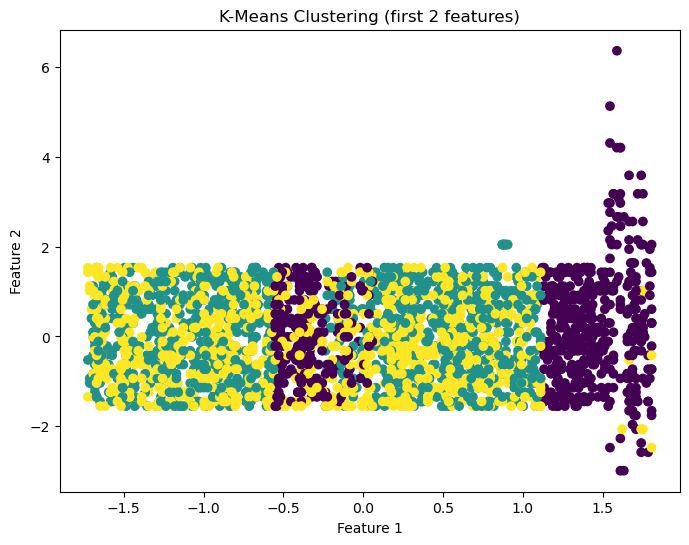

In [80]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df = pd.read_csv("sales_data_sample.csv", encoding='latin1')
print("Dataset Loaded Successfully!\n")
print(df.head())


numeric_df = df.select_dtypes(include=[np.number]).dropna()
print("\nNumeric Columns Used for Clustering:")
print(numeric_df.columns)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)


inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


print("\nCluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Counts:\n", df['Cluster'].value_counts())


plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering (first 2 features)')
plt.show()
